In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
cd

C:\Users\kavya


In [3]:
cd   downloads

C:\Users\kavya\downloads


Importing the data

In [4]:
df=pd.read_csv("adult.csv")

In [5]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


Preparing the Data and Coducting Exploratory data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.shape

(32562, 15)

Coverting all the "?" into null value and deleting null value since we have enough data

In [8]:
df.replace(' ?', pd.NA, inplace=True)

In [9]:
df.isnull().sum()

age                  1
workclass         1837
fnlwgt               1
education            1
education-num        1
marital-status       1
occupation        1844
relationship         1
race                 1
sex                  1
capital-gain         1
capital-loss         1
hours-per-week       1
native-country     584
salary               1
dtype: int64

In [10]:
df.dropna(inplace=True)

Removing the Duplicated data

In [11]:
df.duplicated().sum()

23

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.groupby(['education-num',"education", 'salary',])['salary'].count()

education-num  education      salary
1.0             Preschool      <=50K      44
2.0             1st-4th        <=50K     143
                               >50K        6
3.0             5th-6th        <=50K     275
                               >50K       12
4.0             7th-8th        <=50K     521
                               >50K       35
5.0             9th            <=50K     430
                               >50K       25
6.0             10th           <=50K     761
                               >50K       59
7.0             11th           <=50K     989
                               >50K       59
8.0             12th           <=50K     348
                               >50K       29
9.0             HS-grad        <=50K    8218
                               >50K     1616
10.0            Some-college   <=50K    5334
                               >50K     1335
11.0            Assoc-voc      <=50K     963
                               >50K      344
12.0            As

From above its clear that education-num and education represents the same so will delete one among those here I will delete "education" column

In [14]:
df.drop("education",axis=1,inplace=True)

"fnlwgt" column has no much significance in predicting the salary so this column ca be dropped

In [15]:
df.drop("fnlwgt",axis=1,inplace=True)

Understanding Correlation of data

<AxesSubplot:>

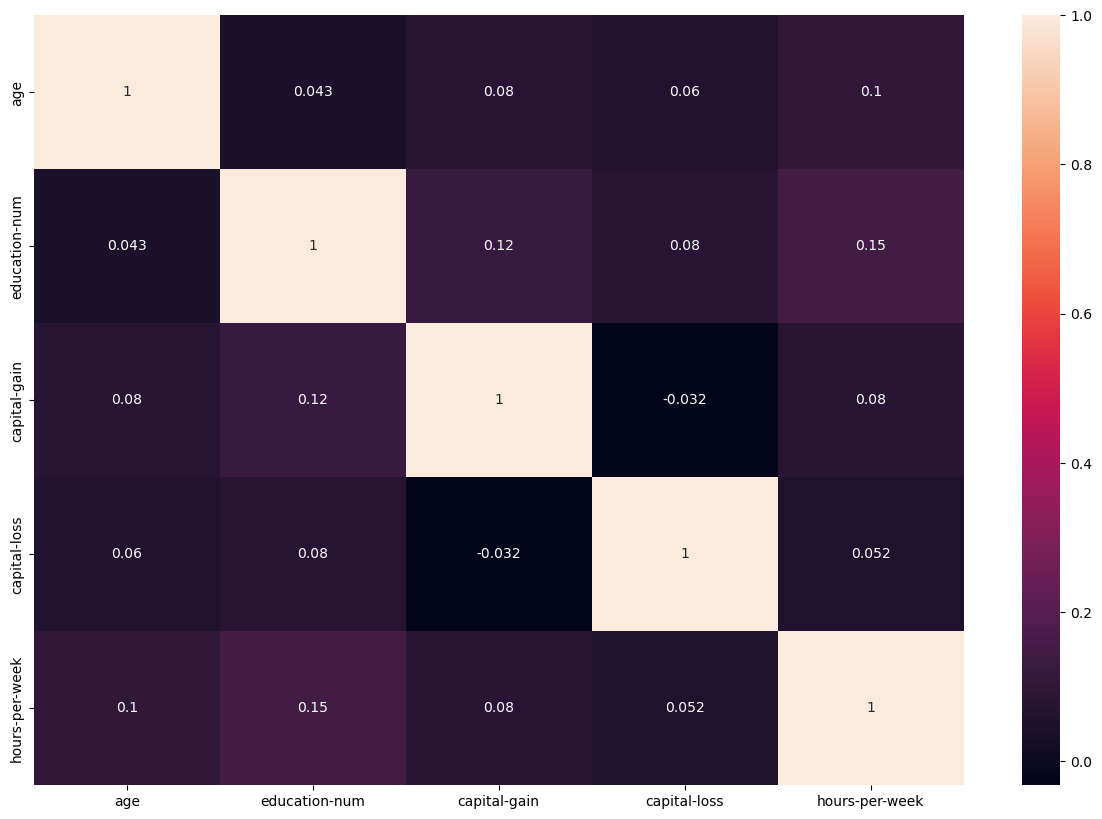

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

Creating a sub count plot for Object data type

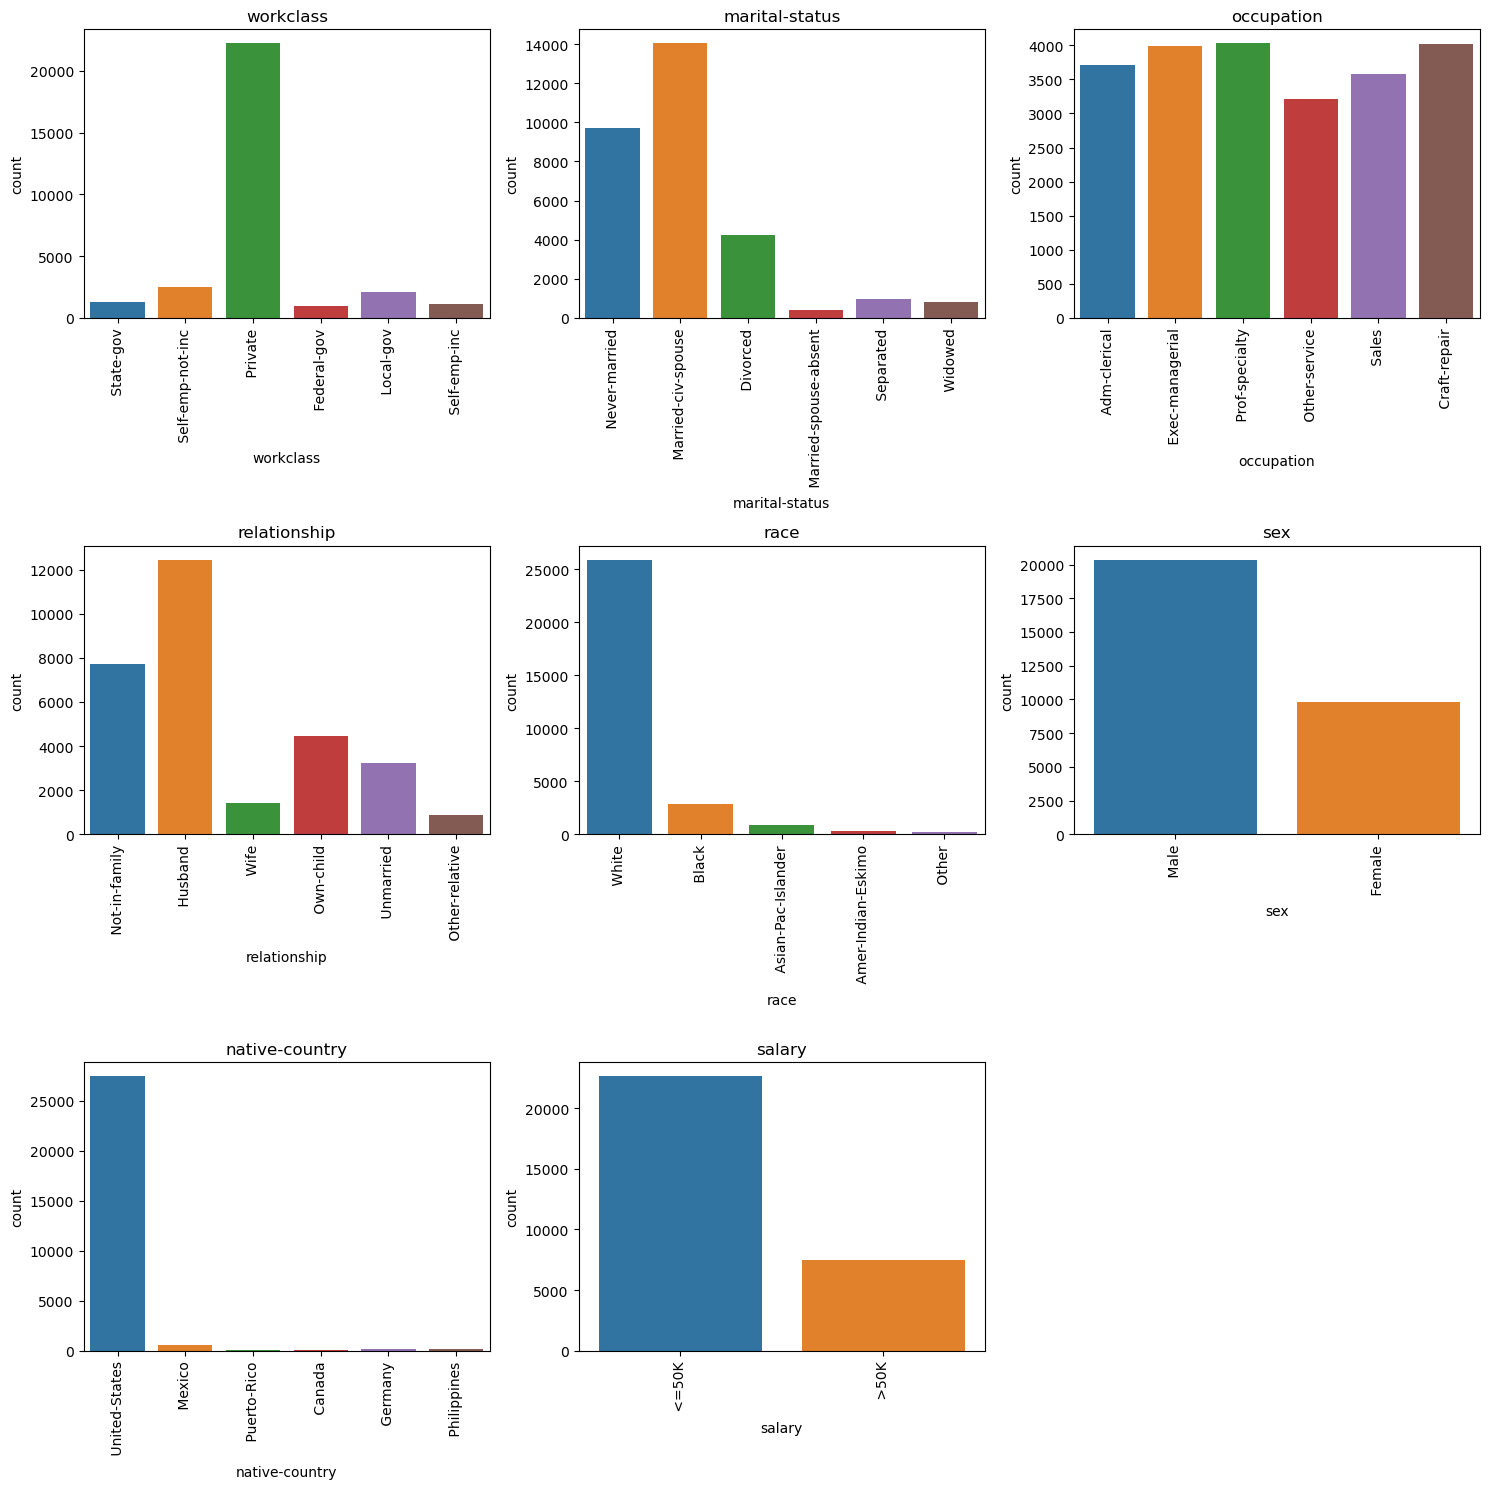

In [17]:
cat_vars = df.select_dtypes(include='object').columns.tolist()
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

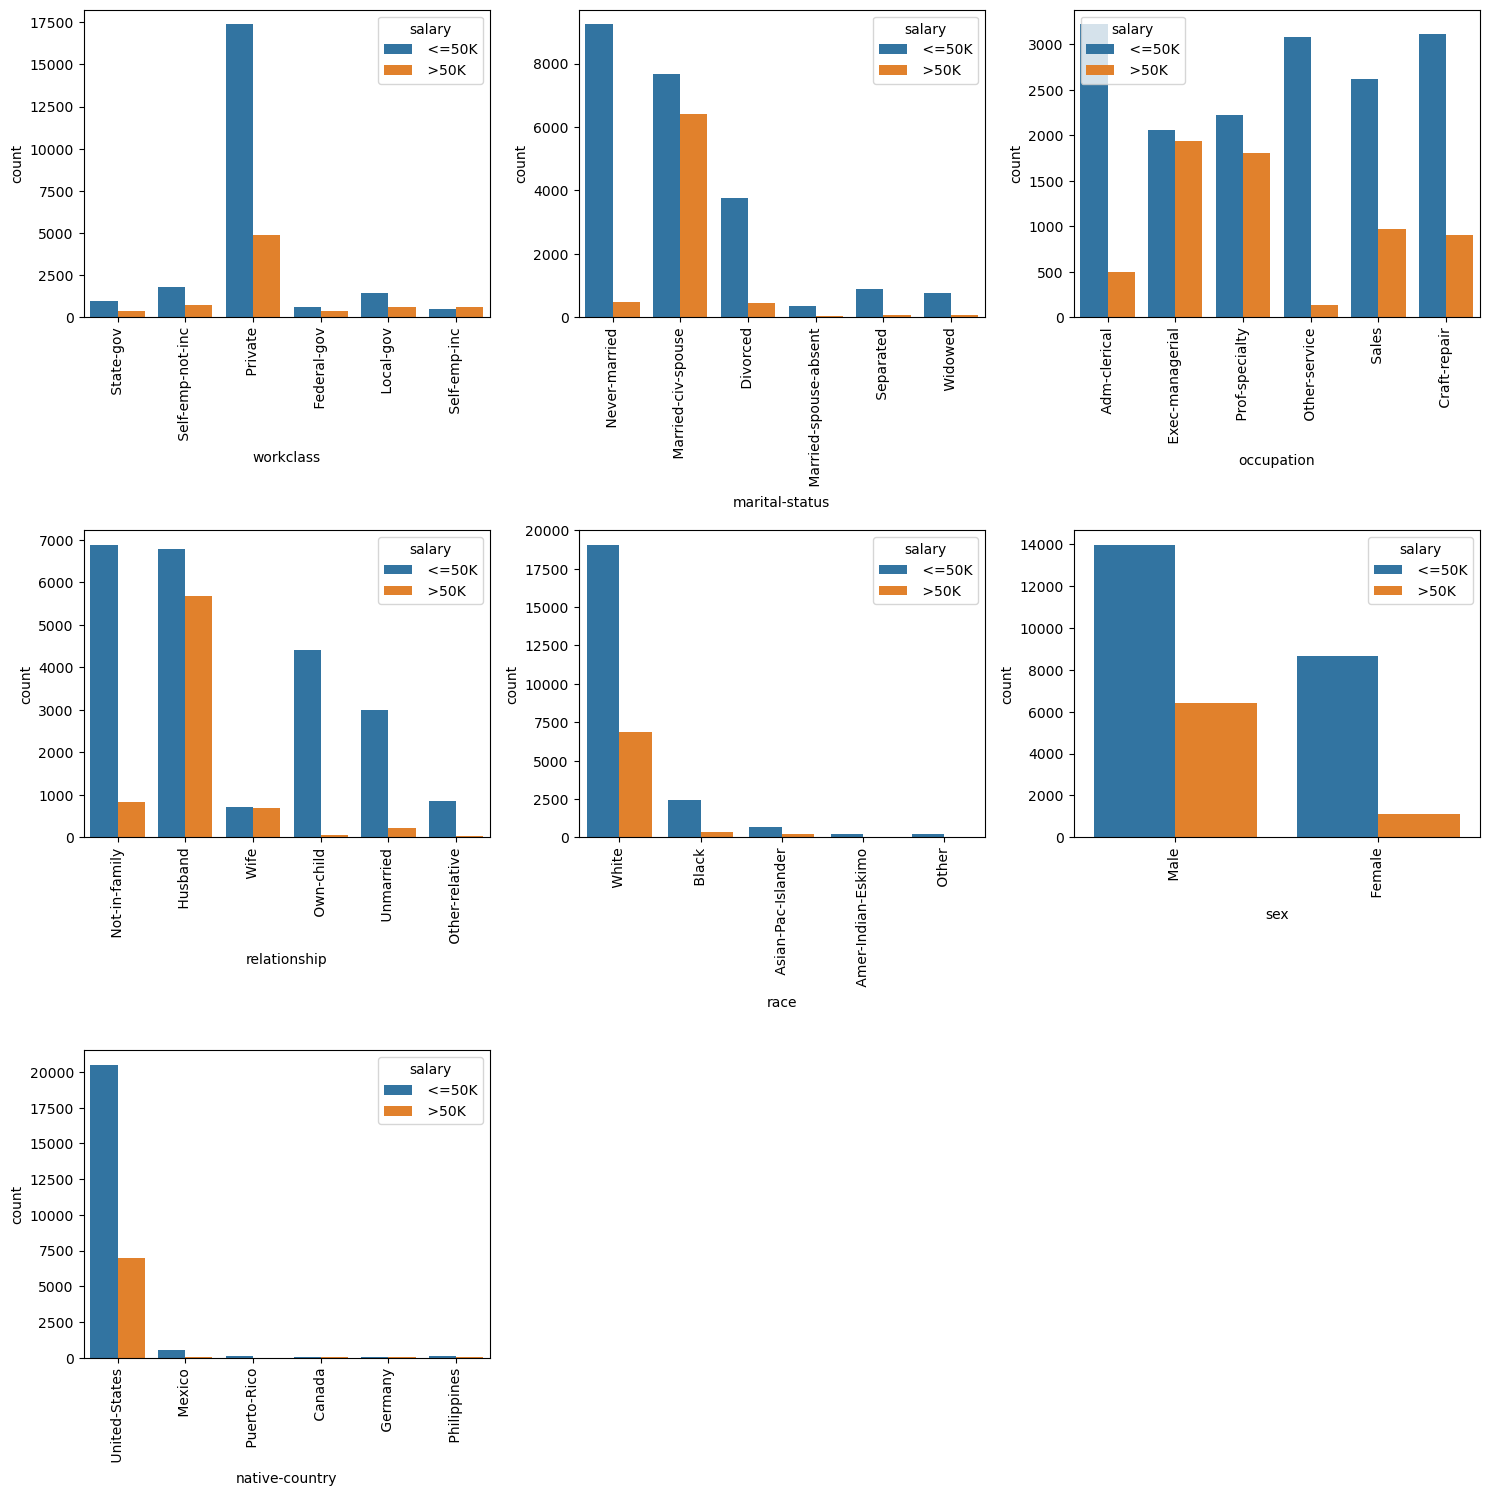

In [18]:
cat_vars = df.select_dtypes(include=['object']).columns.tolist()
if 'salary' in cat_vars:
    cat_vars.remove('salary')
num_cols = len(cat_vars)
num_rows = (num_cols + 2) 
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='salary', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

Insights From Above Charts

1. Count of United State people are more and they earn high>50K compare to others same in case of White race people
2. People who are in private work class in maritual status Married Civ Spouse people also in relationship husband wif Not in family people earn >50 K compare to others

Creating a sub hist plot for int and float data type

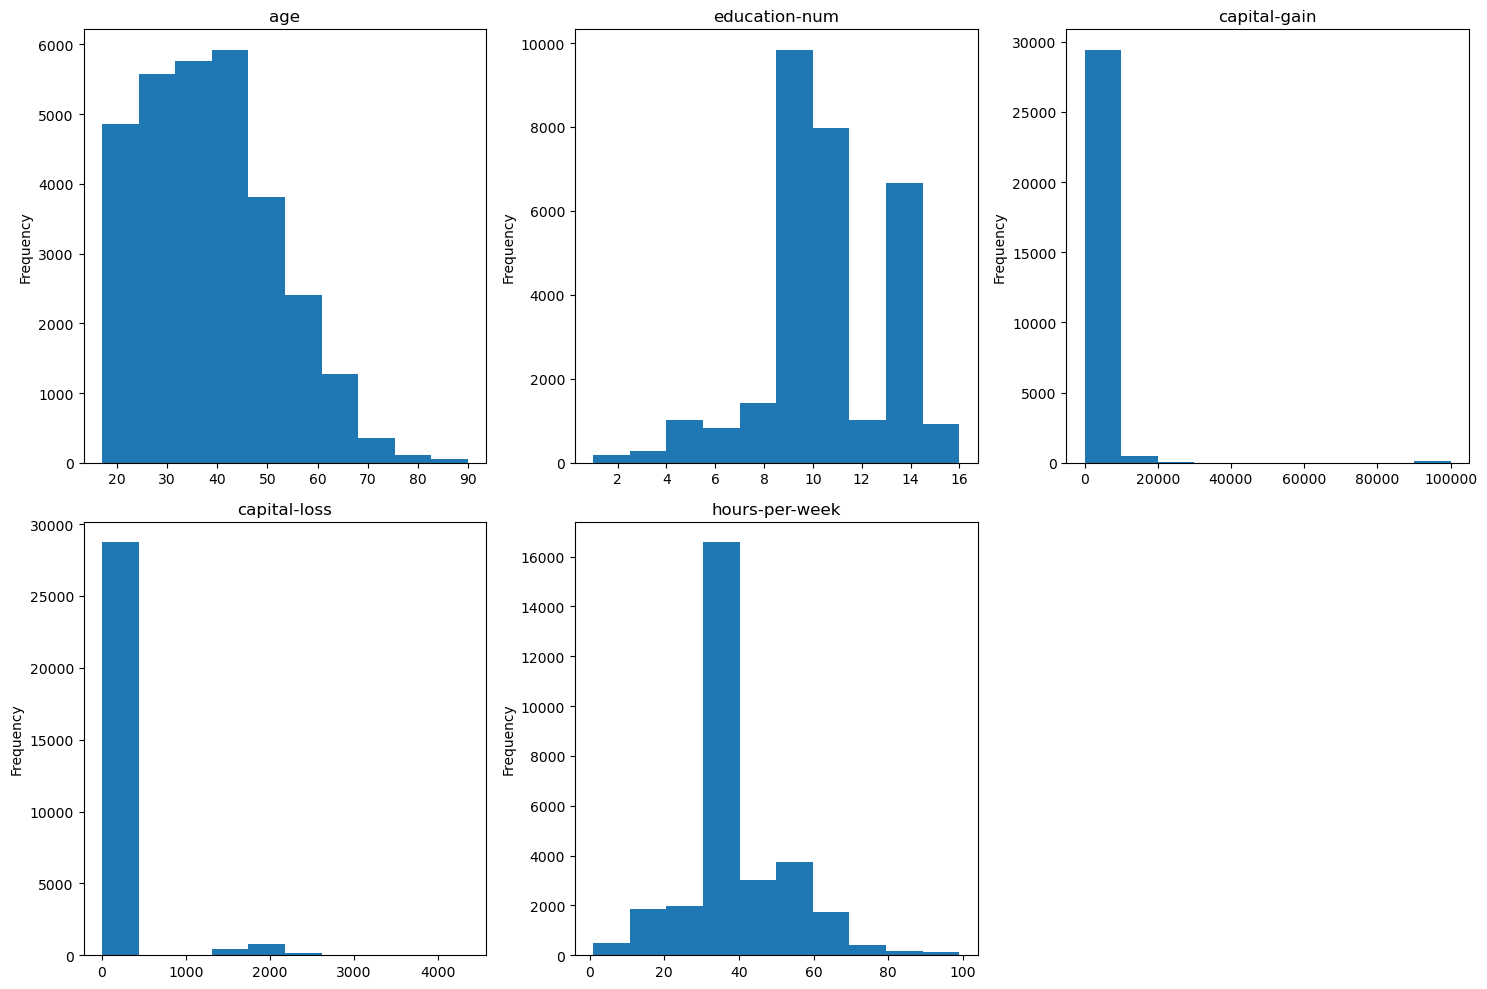

In [19]:
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

Creating a sub hist plot for int and float data type with salary as hue

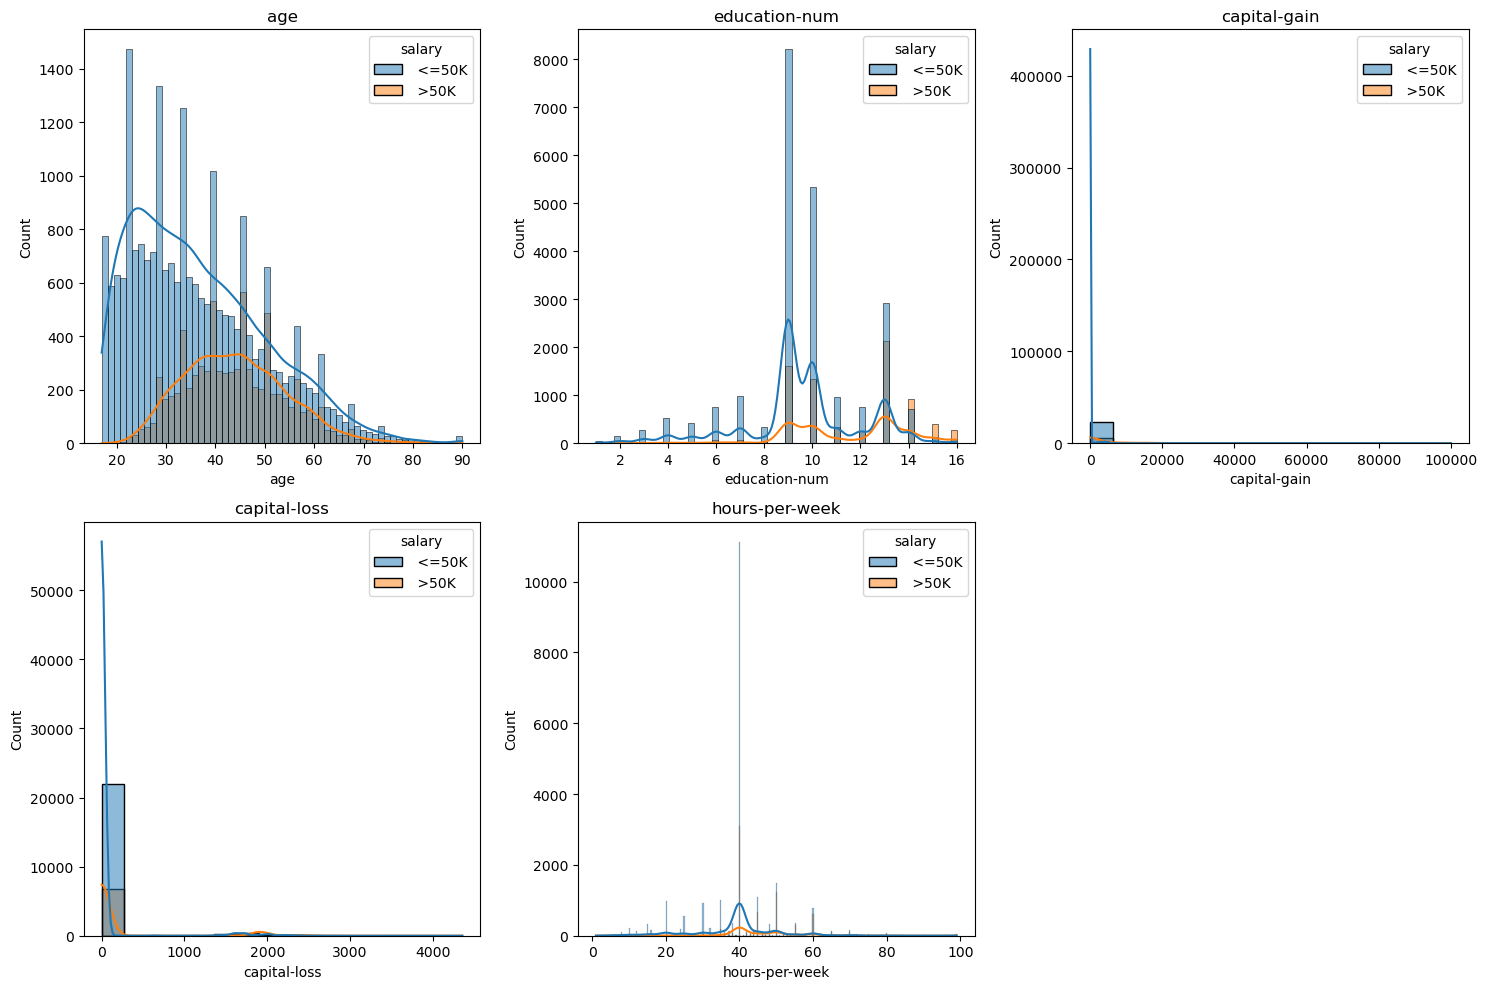

In [20]:
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3 
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, hue='salary', kde=True, ax=axs[i])
    axs[i].set_title(var)
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='capital-gain', ylabel='occupation'>

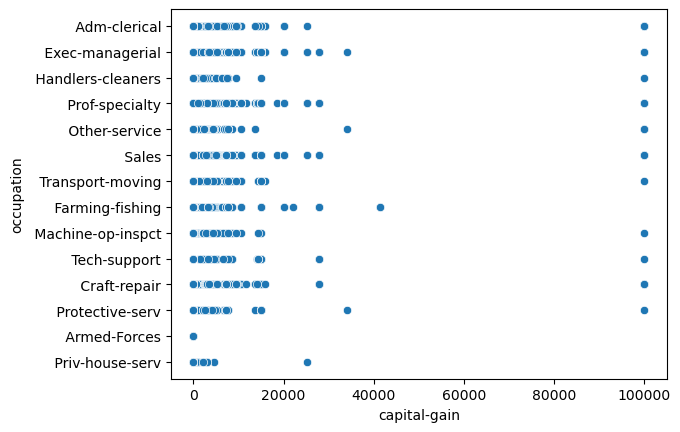

In [21]:
sns.scatterplot(data=df, x="capital-gain", y="occupation")

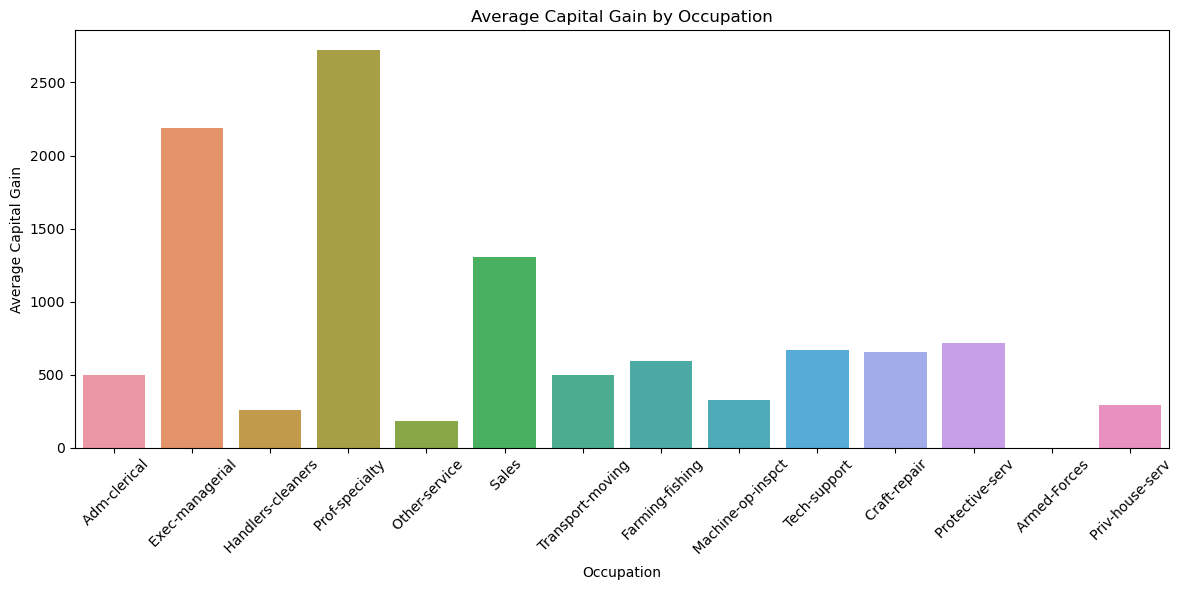

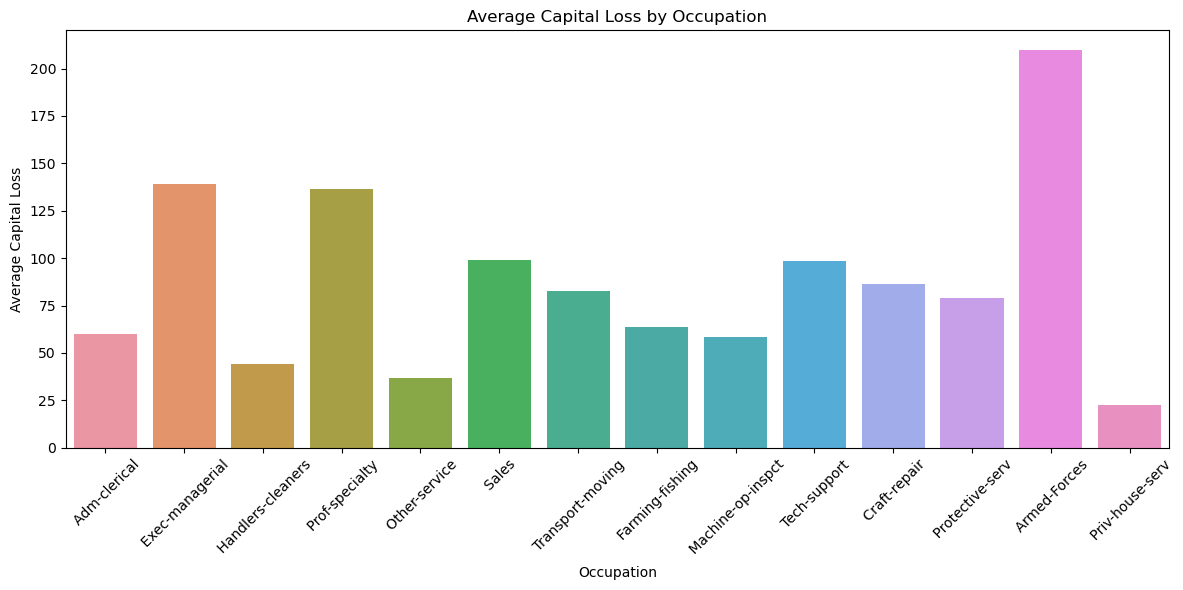

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='capital-gain', data=df, ci=None)
plt.title('Average Capital Gain by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Capital Gain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='capital-loss', data=df, ci=None)
plt.title('Average Capital Loss by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Capital Loss')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

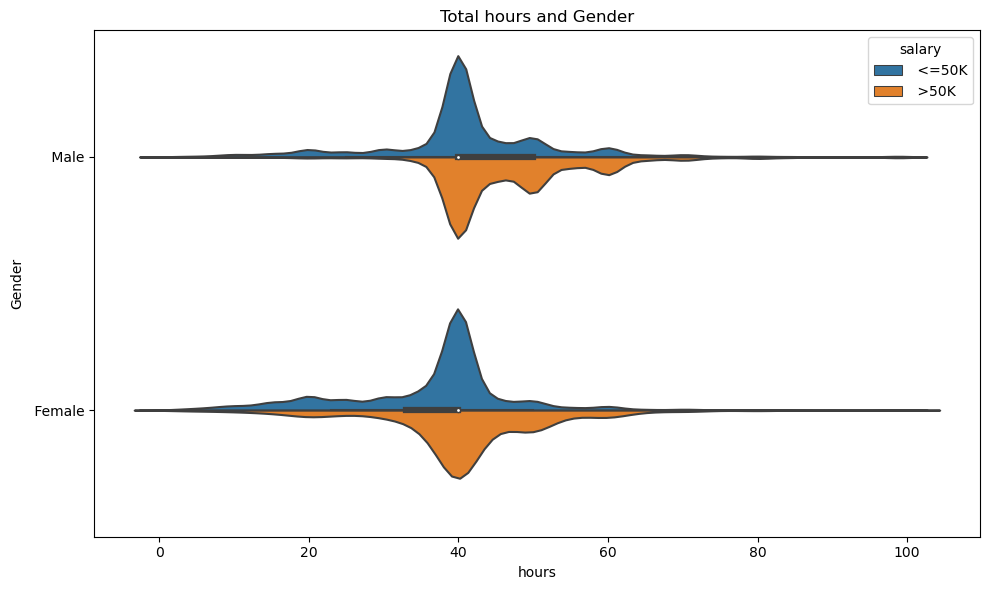

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="hours-per-week", y="sex", hue="salary", data=df, split=True)
plt.title('Total hours and Gender')
plt.xlabel('hours')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

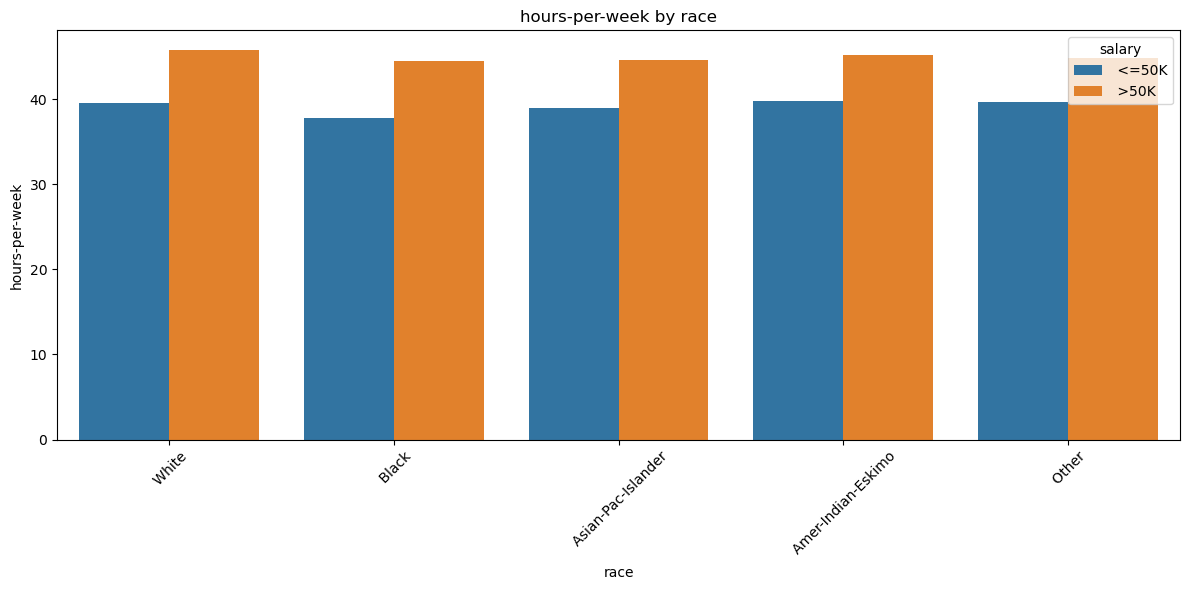

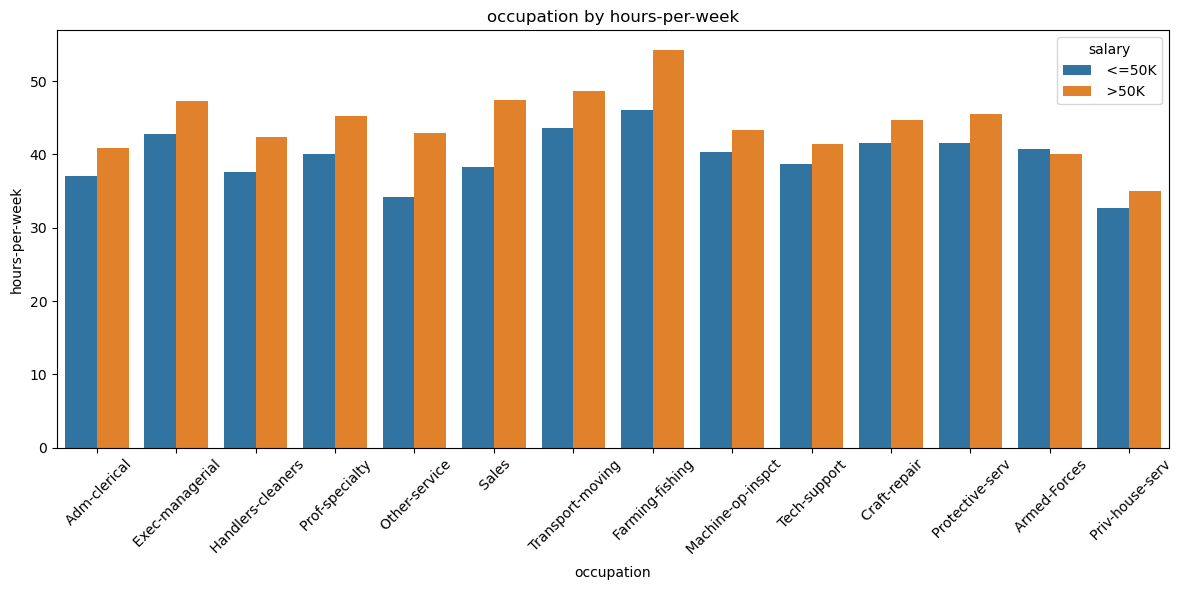

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='race', y='hours-per-week',hue="salary", data=df, ci=None)
plt.title('hours-per-week by race')
plt.xlabel('race')
plt.ylabel('hours-per-week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='hours-per-week',hue="salary", data=df, ci=None)
plt.title('occupation by hours-per-week')
plt.xlabel('occupation')
plt.ylabel('hours-per-week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

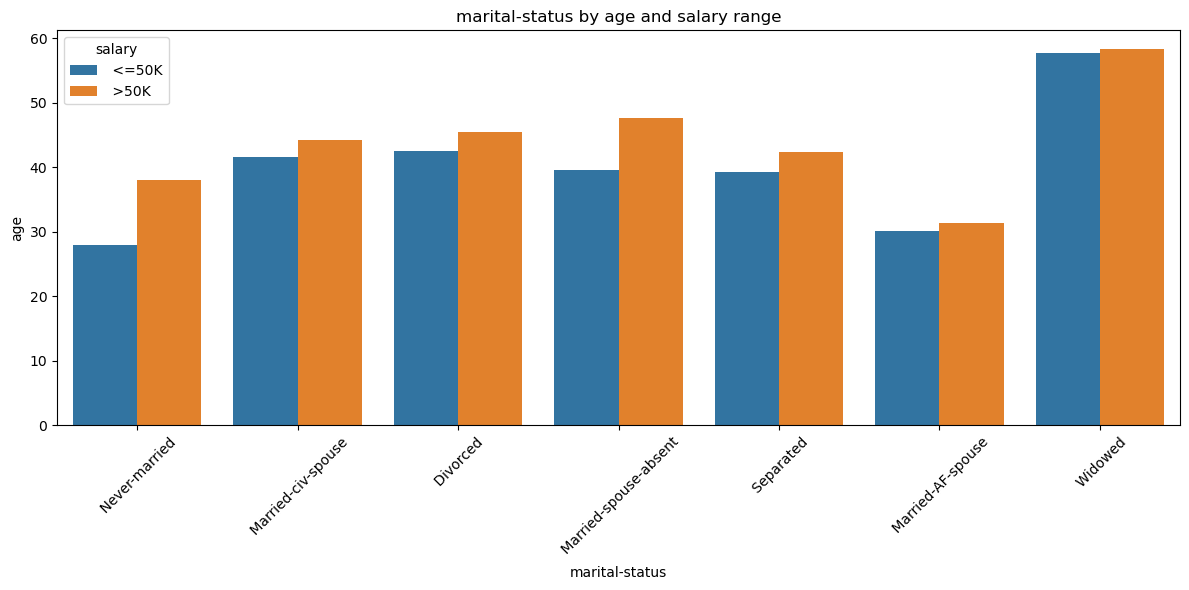

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='marital-status', y='age',hue="salary", data=df, ci=None)
plt.title('marital-status by age and salary range')
plt.xlabel('marital-status')
plt.ylabel('age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights From Above Charts

1. Count of United State people are more and they earn high>50K compare to others same in case of White race people
2. People who are in private work class in maritual status Married Civ Spouse people also in relationship husband wif Not in family people earn >50 K compare to others
3. Males earn >50K compare to Female
4. most of the people work 40 Hours per week. People who work 40 hours or above have higher chance of having salary >50K
5. Most people are educated as 9th 10th, 13 education num

its evident thatData set is a imbalanced with more <50K value so it should be handled


Performing Label Encoding

In [26]:
df.select_dtypes(include='object').nunique()

workclass          7
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
salary             2
dtype: int64

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['native-country'] = le.fit_transform(df['native-country'])
df['salary'] = le.fit_transform(df['salary'])
df['sex'] = le.fit_transform(df['sex'])

Dividing the data into two sets X and Y

In [28]:
X=df.drop(['salary'],axis=1)
Y=df["salary"]

Scaling the data with StandardScaler

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
standard= StandardScaler()
x=standard.fit_transform(X)
X_S=pd.DataFrame(x,columns=X.columns)

Splitting the data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_S, Y, test_size=0.2, random_state=10)

Oversampling should be applied only to the training set. The goal is to balance the class distribution within the training data to help the model learn better. The test set should remain untouched and represent the original, real-world distribution.
After training the model on the balanced training set, should evaluate the model's performance using the original, imbalanced test set. The F1 score (or any evaluation metric) calculated on this test set reflects how well the model generalizes to the original distribution of the data.

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Decision Tree classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(random_state=42)
Tree.fit(X_resampled, y_resampled)
Y_pred_Tree = Tree.predict(X_test)

# Random Forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_resampled, y_resampled)
Y_pred_forest = forest.predict(X_test)

# XGBoost classifier

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_resampled, y_resampled)
Y_pred_xgb = xgb.predict(X_test)

# KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)
Y_pred_knn = knn.predict(X_test)

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7866622428666225

# Evaluating The model

In [36]:
accuracy = accuracy_score(y_test, Y_pred_Tree)*100
print("Accuracy: ",accuracy)
f1 = f1_score(y_test, Y_pred_Tree)*100
print("f1_score: ",f1)
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_Tree))

Accuracy:  79.76111479761114
f1_score:  59.973753280839894
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4477
           1       0.61      0.59      0.60      1551

    accuracy                           0.80      6028
   macro avg       0.73      0.73      0.73      6028
weighted avg       0.80      0.80      0.80      6028



In [37]:
accuracy = accuracy_score(y_test, Y_pred_forest )*100
print("Accuracy: ",accuracy)
f1 = f1_score(y_test, Y_pred_forest )*100
print("f1_score: ",f1)
print(classification_report(y_test, Y_pred_forest))

Accuracy:  82.9794293297943
f1_score:  66.33858267716535
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4477
           1       0.68      0.65      0.66      1551

    accuracy                           0.83      6028
   macro avg       0.78      0.77      0.77      6028
weighted avg       0.83      0.83      0.83      6028



In [38]:
accuracy = accuracy_score(y_test, Y_pred_xgb )*100
print("Accuracy: ",accuracy)
f1 = f1_score(y_test,Y_pred_xgb)*100
print("f1_score: ",f1)
print(classification_report(y_test, Y_pred_xgb))

Accuracy:  85.78301260783012
f1_score:  72.39935587761674
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4477
           1       0.72      0.72      0.72      1551

    accuracy                           0.86      6028
   macro avg       0.81      0.81      0.81      6028
weighted avg       0.86      0.86      0.86      6028



In [39]:
accuracy = accuracy_score(y_test, Y_pred_knn )*100
print("Accuracy: ",accuracy)
f1 = f1_score(y_test,Y_pred_knn)*100
print("f1_score: ",f1)
print(classification_report(y_test, Y_pred_knn))

Accuracy:  78.66622428666224
f1_score:  64.49475427940365
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4477
           1       0.56      0.75      0.64      1551

    accuracy                           0.79      6028
   macro avg       0.73      0.78      0.75      6028
weighted avg       0.82      0.79      0.80      6028



From above its clear that XGBOOST performed well in unblanced test data with 85% of Accuracy.

Trying to Improve the model using Hyper Parameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[8, 13,12], 'max_features': [7,10,12]}
dt = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(dt, parameters)
clf.fit(X_resampled, y_resampled)
clf.best_params_
best_params = clf.best_params_
best_dt_model = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       max_features=best_params['max_features'])
best_dt_model.fit(X_resampled, y_resampled)
y_pred = best_dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_test_pred)
print("Accuracy Score:", accuracy)
print("F1 Score:",test_f1_score)                       

Accuracy Score: 0.8176841406768414
F1 Score: 0.7264931087289432


In [57]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_resampled, y_resampled)
y_test_pred = random_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4477
           1       0.67      0.68      0.68      1551

    accuracy                           0.83      6028
   macro avg       0.78      0.78      0.78      6028
weighted avg       0.83      0.83      0.83      6028



In [46]:
print(test_accuracy,test_f1_score)

0.8518579960185799 0.7264931087289432


In [55]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best Parameters:', best_params)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.8326144658261446
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4477
           1       0.67      0.68      0.68      1551

    accuracy                           0.83      6028
   macro avg       0.78      0.78      0.78      6028
weighted avg       0.83      0.83      0.83      6028



Checking the accuracy with ANN

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_resampled.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_resampled, y_resampled, epochs=10, batch_size=32, validation_split=0.1, verbose=1)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
test_f1_score = f1_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("F1 Score:",test_f1_score)

Epoch 1/10
1022/1022 [==============================] - 3s 2ms/step - loss: 0.4983 - accuracy: 0.7554 - val_loss: 0.4456 - val_accuracy: 0.7949
Epoch 2/10
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4001 - accuracy: 0.8111 - val_loss: 0.4490 - val_accuracy: 0.8053
Epoch 3/10
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3874 - accuracy: 0.8172 - val_loss: 0.4450 - val_accuracy: 0.8078
Epoch 4/10
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3824 - accuracy: 0.8205 - val_loss: 0.4063 - val_accuracy: 0.8370
Epoch 5/10
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3797 - accuracy: 0.8204 - val_loss: 0.4362 - val_accuracy: 0.8164
Epoch 6/10
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3776 - accuracy: 0.8202 - val_loss: 0.3927 - val_accuracy: 0.8450
Epoch 7/10
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3761 - accuracy: 0.8211 - val_loss: 0.4517 - val_accuracy:

# Conclusion

1. Decision Tree Classifier has f1 score as 0.60
2. Random Forest Classifier  has f1 score as 0.66
3. XG Boost Classifier  has f1 score as 0.72
4. KNN Classifier  has f1 score as 0.64
5. ANN Classifier  has f1 score as 0.68

From F1 score we can say XGBOOST and ANN model has good balance between Precision and recall class 

Now considering Accuracy of These two models

1. XG Boost Classifier  has Accuracy as 86%
2. ANN Classifier  has  Accuracy as 81%

Considering both accuracy and F1-score for the positive class, XG boost appears to be the best model as 
it has a good balance between accuracy and precision-recall for the positive class